#**Nhận dạng số MNIST bằng cách sử dụng Deep Learning (Mạng Neural)**

Phân lớp Softmax được xử lý trong một lớp, nhưng mạng lưới Neural sử dụng n lớp, thường được gọi là học sâu - Deep Learning. Nhiều lớp sử dụng một số W (Weight – trọng lượng, trọng số) và b (bias – độ lệch) thay vì một W và một b.
Trong mạng Neural, có một quy tắc phải được tuân theo bởi số lượng dữ liệu đầu vào và dữ liệu đầu ra. Ví dụ: nếu sử dụng 784 pixel dữ liệu làm đầu vào đầu tiên và nhận 10 dữ liệu số từ 0 đến 9 làm đầu ra cuối cùng, nếu đặt 256 dữ liệu đầu ra ở lớp giữa, thì nên nhập vào 256 dữ liệu đầu vào ở lớp tiếp theo. Có thể kiểm tra Weight của mã nguồn chương trình sau.


## Đầu tiên ta cần nhập các thư viện sau:

1.   **tensorflow**: Sử dụng các tính năng và lớp của TensorFlow.
1.   **random**: Sử dụng các hàm liên quan đến số ngẫu nhiên.
2.   **matplotlib.pyplot**: Vẽ đồ thị và hiển thị hình ảnh.
3.   **mnist**: Dữ liệu từ bộ dữ liệu MNIST từ tensorflow.keras.datasets. Bộ dữ liệu MNIST là một bộ dữ liệu chứa các hình ảnh kích thước 28x28 của các chữ số viết tay từ 0 đến 9.

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

## Thiết lập seed cho tính ngẫu nhiên để có thể tái tạo kết quả
1.   **Seed là gì?**

  Seed là một giá trị số nguyên dùng để khởi tạo quy luật sinh số ngẫu nhiên, đảm bảo tính nhất quán trong quá trình thử nghiệm.

2.   **Tại sao cần Seed?**

  *   Tránh sự thay đổi ngẫu nhiên mỗi lần chạy mã.
  *   Tái tạo kết quả và kiểm soát thử nghiệm.

3.   **Cách Sử Dụng Seed trong TensorFlow**

  `tf.random.set_seed(777)`

  Chọn seed phù hợp với mục đích của bạn.
4.   **Kết Quả Tái Tạo**

  Seed giúp tái tạo kết quả mỗi lần chạy mã.
5.   **Không Đặt Seed**

  TensorFlow sẽ sử dụng seed mặc định hoặc giá trị ngẫu nhiên, dẫn đến kết quả không nhất quán.
6.   Quan Trọng trong Đào Tạo Mô Hình

  Kiểm soát số ngẫu nhiên giúp đảm bảo công bằng và nhất quán trong thử nghiệm và so sánh mô hình.


In [2]:
tf.random.set_seed(777)

## Tải dữ liệu MNIST từ thư viện Keras

Trước hết cần tải dữ liệu từ bộ dữ liệu MNIST trong TensorFlow thông qua **mnist.load_data()**. Bộ dữ liệu MNIST là một tập dữ liệu phổ biến trong lĩnh vực học máy, được sử dụng để huấn luyện và kiểm thử mô hình trong bài toán nhận diện chữ số viết tay từ 0 đến 9.

*   **(x_train, y_train)**: *Là dữ liệu huấn luyện, trong đó x_train là các hình ảnh của các chữ số và y_train là nhãn tương ứng của chúng (chứa các giá trị từ 0 đến 9).*

*   **(x_test, y_test)**: *Là dữ liệu kiểm thử, tương tự như dữ liệu huấn luyện, nhưng được sử dụng để kiểm tra hiệu suất của mô hình sau khi đã được huấn luyện.*

Dòng mã dưới đây giúp bạn nhanh chóng nạp dữ liệu MNIST vào các biến x_train, y_train, x_test, và y_test để sử dụng chúng trong quá trình đào tạo và kiểm thử mô hình.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


## Chuẩn hóa giá trị pixel về khoảng [0, 1]
Chúng ta cần thực hiện việc chuẩn hóa dữ liệu hình ảnh trong bộ dữ liệu MNIST. Cụ thể, nó chia giá trị của mỗi pixel trong hình ảnh cho 255.0. Quy trình này được thực hiện để đưa các giá trị pixel về khoảng từ 0 đến 1.

Bởi vì giá trị pixel thường nằm trong khoảng từ 0 đến 255 (với 0 là đen và 255 là trắng), việc chuẩn hóa giúp mô hình học máy hội tụ nhanh hơn và có khả năng tổng quát hóa tốt hơn trên dữ liệu mới.

Chuẩn hóa giá trị pixel giúp giảm biên độ của đặc trưng và đồng thời làm cho mô hình dễ dàng học từ dữ liệu. Nó là một phương pháp chuẩn xác và thường được áp dụng khi xử lý dữ liệu hình ảnh trong các bài toán học máy.

```
x_train = x_train / 255.0
x_test = x_test / 255.0
```



In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## Khai báo các tham số cơ bản cho quá trình đào tạo mô hình.

1.   **learning_rate**: Là tỷ lệ học, xác định bước nhảy trong quá trình cập nhật trọng số của mô hình dựa trên độ dốc của hàm mất mát. Một learning rate nhỏ có thể làm cho mô hình hội tụ chậm, trong khi một learning rate lớn có thể làm cho quá trình hội tụ không ổn định.

2.   **training_epochs**: Là số lần lặp qua toàn bộ tập dữ liệu huấn luyện trong quá trình đào tạo. Mỗi lần lặp gọi là một epoch. Số epoch quyết định số lần mô hình được huấn luyện trên toàn bộ dữ liệu.

3.   **batch_size**: Là kích thước của từng batch (phần nhỏ) dữ liệu được sử dụng để cập nhật trọng số trong mỗi lần lặp (epoch). Việc sử dụng mini-batch giúp giảm bộ nhớ được yêu cầu và tăng tốc quá trình đào tạo, đặc biệt là khi làm việc với dữ liệu lớn. Giá trị thường được chọn là một số nguyên dương, chẳng hạn như 32, 64, hoặc 128.

In [5]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

## Tắt tính toán tự động (eager execution) trong TensorFlow.

**Eager execution** là một tính năng trong TensorFlow 2.x giúp thực hiện tính toán ngay lập tức và giúp việc debug và thử nghiệm trở nên linh hoạt hơn. Tuy nhiên, trong một số trường hợp, nhất là khi sử dụng TensorFlow 1.x, việc tắt eager execution là cần thiết.

Việc tắt eager execution chuyển TensorFlow về chế độ "**graph mode**", nơi tính toán được xây dựng và tối ưu hóa trước khi thực thi. Điều này có thể hữu ích khi bạn đang xây dựng các mô hình lớn và muốn kiểm soát quá trình tính toán một cách chặt chẽ hơn.

In [6]:
tf.compat.v1.disable_eager_execution()

## Tạo hai placeholder trong TensorFlow để đại diện cho dữ liệu đầu vào trong mô hình.
**X: Là một placeholder được tạo để chứa dữ liệu đầu vào của mô hình. Được định hình với kiểu dữ liệu là tf.float32 và kích thước là [None, 784].**
*   None ở đây có nghĩa là số lượng mẫu có thể thay đổi, tùy thuộc vào batch size bạn đưa vào trong quá trình đào tạo hoặc kiểm thử mô hình.
*   784 là số chiều của mỗi mẫu dữ liệu đầu vào. Trong trường hợp này, có thể nghĩ đến đây là số lượng pixel trong mỗi hình ảnh (28x28 pixel) được làm phẳng thành một vector có kích thước 784.

**Y: Là một placeholder được tạo để chứa nhãn tương ứng với dữ liệu đầu vào. Được định hình với kiểu dữ liệu là tf.float32 và kích thước là [None, 10].**

  *   None ở đây cũng có ý nghĩa giống như ở placeholder X, có thể thay đổi tùy thuộc vào batch size.
  *  10 là số lượng lớp, và mỗi mẫu dữ liệu sẽ được biểu diễn bằng một vector one-hot encoding với 10 phần tử. Điều này phản ánh rằng mô hình sẽ đưa ra dự đoán về xác suất cho mỗi lớp (tổng cộng là 10 lớp).

In [7]:
X = tf.compat.v1.placeholder(tf.float32, [None, 784])
Y = tf.compat.v1.placeholder(tf.float32, [None, 10])

## Xây dựng một mô hình neural network (mạng nơ-ron) với ba tầng (layer).
**Mô hình này có ba tầng tuyến tính và hai hàm kích hoạt ReLU (Rectified Linear Unit).**

1. **Tạo các biến trọng số và bias cho từng tầng:**
   - `W1`, `W2`, `W3`: Là các ma trận trọng số cho tầng thứ nhất, thứ hai và thứ ba tương ứng.
   - `b1`, `b2`, `b3`: Là các vector bias tương ứng với từng tầng.

   Mỗi ma trận trọng số có kích thước [số đầu vào, số đầu ra]. Cụ thể ở đây, `W1` có kích thước [784, 256], `W2` có kích thước [256, 256], và `W3` có kích thước [256, 10]. Các vector bias có số chiều tương ứng với số đầu ra của từng tầng.

2. **Xây dựng các tầng của mạng nơ-ron:**
   - `L1`: Tầng thứ nhất với hàm kích hoạt ReLU (`tf.nn.relu`). Đầu vào của tầng này là `X` (đầu vào của mô hình), và đầu ra là kết quả của phép nhân ma trận giữa `X` và `W1`, sau đó cộng thêm vector bias `b1` và áp dụng hàm kích hoạt ReLU.
   - `L2`: Tầng thứ hai tương tự như tầng thứ nhất. Đầu vào của tầng này là đầu ra của tầng thứ nhất (`L1`), và đầu ra là kết quả của phép nhân ma trận giữa `L1` và `W2`, sau đó cộng thêm vector bias `b2` và áp dụng hàm kích hoạt ReLU.
   - `hypothesis`: Tầng cuối cùng, không sử dụng hàm kích hoạt, với đầu vào là đầu ra của tầng thứ hai (`L2`). Kết quả của phép nhân ma trận giữa `L2` và `W3`, sau đó cộng thêm vector bias `b3`.

Các phép toán này thường được sử dụng trong quá trình feedforward của mạng nơ-ron để tạo ra dự đoán từ đầu vào. Các trọng số (`W1`, `W2`, `W3`) và bias (`b1`, `b2`, `b3`) sẽ được điều chỉnh trong quá trình huấn luyện mô hình để giảm sai số giữa dự đoán và giá trị thực tế.

In [8]:
W1 = tf.Variable(tf.compat.v1.random_normal([784, 256]))
b1 = tf.Variable(tf.compat.v1.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.compat.v1.random_normal([256, 256]))
b2 = tf.Variable(tf.compat.v1.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.compat.v1.random_normal([256, 10]))
b3 = tf.Variable(tf.compat.v1.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

## Định nghĩa hàm chi phí (cost/loss) và bộ tối ưu hóa (optimizer) để huấn luyện mô hình

1. **Hàm chi phí (Cost/Loss):**  
   - `tf.nn.softmax_cross_entropy_with_logits`: Đây là hàm chi phí sử dụng trong bài toán phân loại nhiều lớp khi đầu ra của mô hình được áp dụng hàm softmax (đối với `hypothesis`). Hàm này tính toán sự chênh lệch giữa phân phối xác suất dự đoán (`hypothesis`) và phân phối xác suất thực tế (`Y`), sau đó tính giá trị trung bình của các sự chênh lệch này trên toàn bộ dữ liệu.
   - `tf.reduce_mean`: Là hàm tính giá trị trung bình của các phần tử trong ma trận. Nó giúp chuyển từ chi phí tổng cộng sang chi phí trung bình trên mỗi mẫu dữ liệu.

2. **Bộ tối ưu hóa (Optimizer):**
   - `tf.compat.v1.train.GradientDescentOptimizer`: Đây là một trình tối ưu hóa sử dụng thuật toán gradient descent để điều chỉnh trọng số và bias của mô hình để giảm chi phí. `learning_rate` là một siêu tham số quan trọng trong thuật toán này, xác định kích thước của bước cập nhật trong không gian trọng số. Nó quyết định tốc độ học của mô hình - nếu quá lớn, có thể bị vượt quá điểm tối ưu; nếu quá nhỏ, quá trình học sẽ diễn ra rất chậm.
   - `minimize(cost)`: Là phương thức của optimizer, được sử dụng để tối ưu hóa hàm chi phí. Nó sẽ thực hiện quá trình lan truyền ngược (backpropagation) để tính gradient của hàm chi phí đối với các tham số (trọng số và bias), sau đó áp dụng gradient descent để cập nhật các tham số và giảm chi phí.

Tóm lại, qua mỗi lượt huấn luyện, trọng số và bias của mô hình sẽ được cập nhật dựa trên đạo hàm của hàm chi phí, và quá trình này sẽ được thực hiện với mỗi mini-batch của dữ liệu đào tạo để cải thiện hiệu suất của mô hình.

In [9]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
  logits=hypothesis, labels=Y
))
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

## Khởi tạo một phiên (session) của TensorFlow và khởi tạo tất cả các biến (trọng số và bias) trong mô hình.

1. **Khởi tạo phiên TensorFlow:**
   - `tf.compat.v1.Session()`: Tạo một phiên TensorFlow. Phiên này sẽ được sử dụng để thực hiện các phép toán trong đồ thị tính toán của TensorFlow.

2. **Khởi tạo tất cả các biến:**
   - `tf.compat.v1.global_variables_initializer()`: Tạo một hoạt động (operation) để khởi tạo tất cả các biến trong đồ thị tính toán. Biến là các tham số (trọng số và bias) trong mô hình, và trước khi bắt đầu quá trình huấn luyện, chúng ta cần khởi tạo chúng với các giá trị ban đầu.

   - `sess.run(tf.compat.v1.global_variables_initializer())`: Chạy hoạt động khởi tạo trong phiên TensorFlow. Sau dòng mã này, tất cả các biến trong mô hình đã được khởi tạo với giá trị ngẫu nhiên (được tạo trong các lớp trọng số và bias) và sẵn sàng để bắt đầu quá trình huấn luyện.

Điều này là quan trọng vì trước khi huấn luyện mô hình, chúng ta cần có các giá trị khởi tạo cho trọng số và bias để bắt đầu quá trình học từ.

In [10]:
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

## Huấn luyện mô hình:

### 1. Vòng lặp Huấn luyện:

```python
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(len(x_train) / batch_size)
```

- `for epoch in range(training_epochs):`: Bắt đầu vòng lặp qua các epoch (lượt huấn luyện). Mỗi epoch đại diện cho một lượt đưa toàn bộ tập dữ liệu qua mô hình.

- `avg_cost = 0`: Khởi tạo giá trị trung bình của chi phí để theo dõi sự thay đổi của chi phí trong suốt quá trình huấn luyện.

- `total_batch = int(len(x_train) / batch_size)`: Tính tổng số mini-batch trong mỗi epoch. `batch_size` là kích thước của từng mini-batch, và `len(x_train)` là số lượng mẫu trong tập huấn luyện.

### 2. Vòng lặp qua Mini-batch:

```python
    for i in range(total_batch):
        start = i * batch_size
        end = (i + 1) * batch_size
        batch_xs, batch_ys = x_train[start:end], y_train[start:end]
        batch_xs = batch_xs.reshape(-1, 784)
        batch_ys = tf.keras.utils.to_categorical(batch_ys, 10)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
```

- `for i in range(total_batch):`: Bắt đầu vòng lặp qua từng mini-batch trong mỗi epoch.

- `start = i * batch_size`, `end = (i + 1) * batch_size`: Xác định đoạn của tập huấn luyện mà mini-batch đang xử lý.

- `batch_xs, batch_ys = x_train[start:end], y_train[start:end]`: Lấy ra các mẫu và nhãn của mini-batch hiện tại từ tập huấn luyện.

- `batch_xs = batch_xs.reshape(-1, 784)`: Reshape ma trận dữ liệu đầu vào của mỗi mini-batch về kích thước [số lượng mẫu, số lượng đặc trưng] (ở đây là [batch_size, 784]).

- `batch_ys = tf.keras.utils.to_categorical(batch_ys, 10)`: Chuyển đổi nhãn về dạng one-hot encoding vì hàm chi phí `tf.nn.softmax_cross_entropy_with_logits` mong đợi nhãn ở dạng này.

- `feed_dict = {X: batch_xs, Y: batch_ys}`: Tạo một feed dictionary để cung cấp dữ liệu vào các placeholder `X` và `Y` trong đồ thị tính toán.

- `c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)`: Chạy một lượt lan truyền và lan truyền ngược trên mini-batch hiện tại. `c` là giá trị chi phí của mini-batch, và `_` chỉ đơn giản là một biến giả mà chúng ta không quan tâm (được sử dụng để chạy optimizer).

- `avg_cost += c / total_batch`: Cập nhật giá trị trung bình của chi phí cho epoch hiện tại.

### 3. In thông tin sau mỗi epoch:

```python
    print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
```

- In ra giá trị trung bình của chi phí sau mỗi epoch.

### 4. Kết thúc quá trình huấn luyện:

```python
print('Learning Finished')
```

- In ra thông báo khi quá trình huấn luyện kết thúc.

Toàn bộ quá trình này được thực hiện để điều chỉnh trọng số và bias của mô hình sao cho chi phí trung bình giảm qua mỗi epoch, từ đó cải thiện khả năng dự đoán của mô hình trên tập huấn luyện.

In [11]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(len(x_train) / batch_size)

    for i in range(total_batch):
        start = i * batch_size
        end = (i + 1) * batch_size
        batch_xs, batch_ys = x_train[start:end], y_train[start:end]
        batch_xs = batch_xs.reshape(-1, 784)
        batch_ys = tf.keras.utils.to_categorical(batch_ys, 10)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))

print('Learning Finished')

Epoch: 0001 cost =  155.467885487
Epoch: 0002 cost =  58.857990342
Epoch: 0003 cost =  43.462381841
Epoch: 0004 cost =  35.099588726
Epoch: 0005 cost =  29.537680197
Epoch: 0006 cost =  25.561045629
Epoch: 0007 cost =  22.645365008
Epoch: 0008 cost =  20.317035378
Epoch: 0009 cost =  18.432497804
Epoch: 0010 cost =  16.832576158
Epoch: 0011 cost =  15.496460258
Epoch: 0012 cost =  14.327235793
Epoch: 0013 cost =  13.306521504
Epoch: 0014 cost =  12.444058902
Epoch: 0015 cost =  11.665969313
Learning Finished


## Kiểm thử mô hình và đánh giá độ chính xác trên tập kiểm thử. Dưới đây là giải thích từng phần:

1. **Dự đoán đúng (Correct Prediction):**
   ```python
   correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
   ```
   - `tf.argmax(hypothesis, 1)`: Tìm ra index của giá trị lớn nhất trong vector dự đoán `hypothesis` trên mỗi mẫu dữ liệu.
   - `tf.argmax(Y, 1)`: Tìm ra index của giá trị lớn nhất trong vector nhãn thực tế `Y` trên mỗi mẫu dữ liệu.
   - `tf.equal`: So sánh hai vector index, trả về một vector boolean, với `True` nếu dự đoán đúng và `False` nếu dự đoán sai.

2. **Độ chính xác (Accuracy):**
   ```python
   accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
   ```
   - `tf.cast(correct_prediction, tf.float32)`: Chuyển đổi vector boolean thành vector số thực (1.0 cho `True` và 0.0 cho `False`).
   - `tf.reduce_mean`: Tính giá trị trung bình của vector số thực, cho ta tỉ lệ dự đoán đúng trên toàn bộ tập kiểm thử.

3. **In ra độ chính xác:**
   ```python
   print('Accuracy:', sess.run(accuracy, feed_dict={
       X: x_test.reshape(-1, 784),
       Y: tf.keras.utils.to_categorical(y_test, 10)
   }))
   ```
   - `sess.run(accuracy, feed_dict={...})`: Chạy đồ thị tính toán để tính toán độ chính xác trên tập kiểm thử.
   - `X: x_test.reshape(-1, 784)`: Feed giá trị đầu vào kiểm thử vào placeholder `X`.
   - `Y: tf.keras.utils.to_categorical(y_test, 10)`: Chuyển đổi nhãn kiểm thử về dạng one-hot encoding và feed vào placeholder `Y`.

Cuối cùng, dòng mã này in ra độ chính xác của mô hình trên tập kiểm thử. Độ chính xác được tính bằng cách so sánh dự đoán của mô hình với nhãn thực tế và tính tỉ lệ dự đoán đúng trên toàn bộ tập kiểm thử.

In [12]:
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
    X: x_test.reshape(-1, 784),
    Y: tf.keras.utils.to_categorical(y_test, 10)
}))

Accuracy: 0.9078


## Chọn một mẫu ngẫu nhiên từ tập kiểm thử, dự đoán nhãn của mẫu đó bằng mô hình, và hiển thị hình ảnh cùng với nhãn thực tế và dự đoán.

1. **Chọn mẫu ngẫu nhiên từ tập kiểm thử:**
   ```python
   r = random.randint(0, len(x_test) - 1)
   ```
   - `random.randint(0, len(x_test) - 1)`: Tạo một số ngẫu nhiên là index của một mẫu trong tập kiểm thử.

2. **In ra nhãn thực tế của mẫu đã chọn:**
   ```python
   print("Label:", y_test[r])
   ```
   - In ra nhãn thực tế của mẫu đã chọn.

3. **Dự đoán nhãn bằng mô hình:**
   ```python
   print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: x_test[r].reshape(1, -1)}))
   ```
   - `sess.run(tf.argmax(hypothesis, 1), feed_dict={X: x_test[r].reshape(1, -1)})`: Chạy đồ thị tính toán để dự đoán nhãn của mẫu đã chọn bằng mô hình. `tf.argmax(hypothesis, 1)` trả về index của giá trị lớn nhất trong vector dự đoán.

4. **Hiển thị hình ảnh của mẫu đã chọn:**
   ```python
   plt.imshow(x_test[r], cmap="hot")
   plt.show()
   ```
   - `plt.imshow(x_test[r], cmap="hot")`: Hiển thị hình ảnh của mẫu đã chọn sử dụng thư viện Matplotlib.
   - `plt.show()`: Hiển thị hình ảnh trong cửa sổ đồ họa.

Dòng mã này giúp bạn có cái nhìn trực quan về cách mô hình dự đoán trên một mẫu cụ thể từ tập kiểm thử.

Label: 0
Prediction: [0]


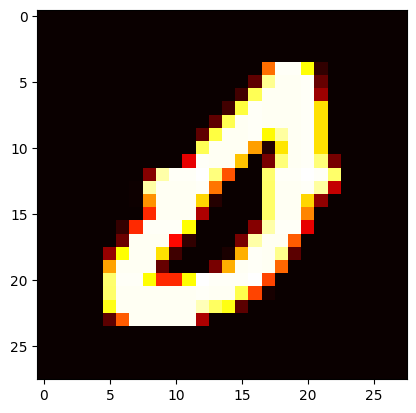

In [13]:
r = random.randint(0, len(x_test) - 1)
print("Label:", y_test[r])
print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: x_test[r].reshape(1, -1)}))
plt.imshow(x_test[r], cmap="hot")
plt.show()